In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
df

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0
5,B,High,34.8
6,B,High,27.0
7,B,High,30.2
8,B,High,30.8
9,B,High,26.4


Text(0.5, 1.0, 'histogram of hp')

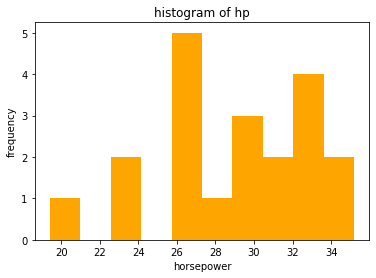

In [5]:
import matplotlib.pyplot as plt
x=df['Yield']
plt.hist(x,color='orange',bins=10)
plt.xlabel("horsepower")
plt.ylabel("frequency")
plt.title("histogram of hp")

In [6]:
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
formula='Yield~Fert+Water'
model=ols(formula,df).fit()
aov_table=statsmodels.stats.anova.anova_lm(model,type=1)
print(aov_table)

            df   sum_sq    mean_sq         F    PR(>F)
Fert       1.0   69.192  69.192000  5.669070  0.029228
Water      1.0   63.368  63.368000  5.191895  0.035887
Residual  17.0  207.488  12.205176       NaN       NaN


In [7]:
formula='Yield~Fert+Water+Fert:Water'
model=ols(formula,df).fit()
aov_table=statsmodels.stats.anova.anova_lm(model,type=1)
print(aov_table)

              df   sum_sq  mean_sq         F    PR(>F)
Fert         1.0   69.192   69.192  5.766000  0.028847
Water        1.0   63.368   63.368  5.280667  0.035386
Fert:Water   1.0   15.488   15.488  1.290667  0.272656
Residual    16.0  192.000   12.000       NaN       NaN


In [8]:
#fit the models
model2=ols('Yield~C(Fert)+C(Water)',df).fit()

In [9]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     5.430
Date:                Mon, 10 Feb 2020   Prob (F-statistic):             0.0150
Time:                        16:24:50   Log-Likelihood:                -51.772
No. Observations:                  20   AIC:                             109.5
Df Residuals:                      17   BIC:                             112.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.6800      1.353     24.153      0.000      29.825      35.535
C(Fert)[T.B]       -3.7200      1.562     -2.381      0.029      -7.016      -0.424
C(Water)[T.Low]    -3.5600      1.562     -2.279      0.036      -6.856      -0.264
==============================================================================
Omnibus:                        1.169   Durbin-Watson:                   2.736
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.820
Skew:                          -0.081   Prob(JB):                        0.664
Kurtosis:                       2.022   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
from statsmodels.stats.multicomp import MultiComparison
mc=statsmodels.stats.multicomp.MultiComparison(df['Yield'],df['Fert'])

mc_results=mc.tukeyhsd()
print(mc_results)
#reject=true
#there is statistically significant difference between the mean crop yield
#fertilize A Yields  a significantly higher crop yield than fertilizer

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B    -3.72 0.0459 -7.3647 -0.0753   True
----------------------------------------------------


In [15]:
from statsmodels.stats.multicomp import MultiComparison
mc=statsmodels.stats.multicomp.MultiComparison(df['Yield'],df['Water'])

mc_results=mc.tukeyhsd()
print(mc_results)

#reject =False
#there is not a statstically difference in the mean crop
#yield between the amount of water is used

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low    -3.56 0.0574 -7.2436 0.1236  False
---------------------------------------------------


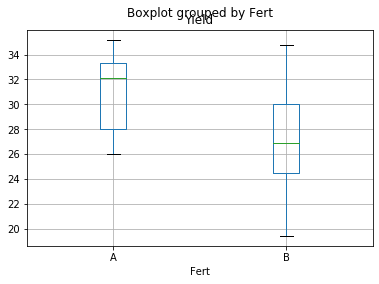

In [13]:
df.boxplot('Yield',by='Fert')
plt.show()

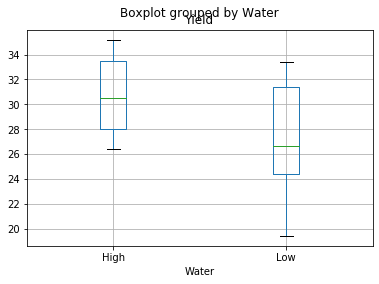

In [16]:
df.boxplot('Yield',by='Water')
plt.show()